import pandas as pd
import numpy as np

#not sure which I will use. Perhaps testing both
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('Data/co_rev_sample_filtered.csv', encoding = 'utf-8')

C:\Users\dsp21\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Labeling the names of the columns to differentiate unique review values and company wide columns:

In [6]:
review_spec_cols = ['agg_rating','comp_ben_rating', 
    'culture_rating', 'jobsec_advancement_rating', 
       'management_rating', 'work_life_rating', 'helpful_downvote_count',
       'helpful_upvote_count', 'review_id','review_date', 'review_title',
       'reviewer_company_empl_status', 'reviewer_job_location',
       'reviewer_job_title', 'main_text', 'con_text', 'pro_text'
]

company_cols = df.columns[~(df.columns.isin(review_spec_cols))]

numeric_review_spec_cols = df[review_spec_cols].describe().columns
df[review_spec_cols].describe()

from itertools import compress
review_labels = list(compress(review_spec_cols,[(x not in numeric_review_spec_cols) for x in review_spec_cols]))
review_labels

['review_date',
 'review_title',
 'reviewer_company_empl_status',
 'reviewer_job_location',
 'reviewer_job_title',
 'main_text',
 'con_text',
 'pro_text']

### Initial Graphs
Testing both Seaborn and matplotplib

##### Potential graphs to do:
- box-plot of each variable below (similar to describe)
- univariate distribution: histogram and smoothed for:
    - agg_rating
    - comp_,'comp_ben_rating','culture_rating', 'jobsec_advancement_rating', 
       'management_rating', 'work_life_rating', 'helpful_downvote_count','helpful_upvote_count'

- bivariate: scatter, aggregate totals i.e. columns date_time: count, mean agg_rating, agg_rating bounds
    - scatter-plot matrix
- some sort of tabplot ordered by agg_rating or maybe by company overall rating. "parralel coordinate"

       

In [7]:
plt.hist(df['agg_rating'], bins=20, color="#5ee3ff")

(array([  6835.,      0.,      0.,      0.,      0.,   8832.,      0.,
             0.,      0.,      0.,  27330.,      0.,      0.,      0.,
             0.,  40402.,      0.,      0.,      0.,  43493.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
         3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 20 Patch objects>)

##### This whole time I'm forgetting:

In [8]:
%matplotlib inline

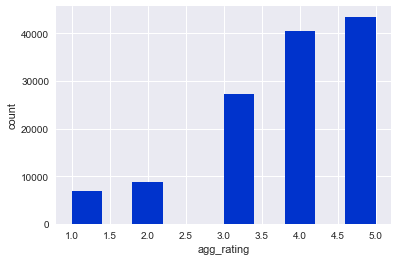

In [16]:
plt.hist(df['agg_rating'], color = "#0033cc")
plt.ylabel('count')
plt.xlabel('agg_rating')

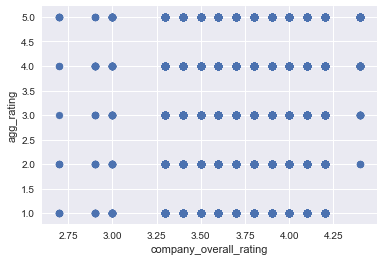

In [17]:
plt.scatter(df['company_overall_rating'], df['agg_rating'])
plt.xlabel('company_overall_rating')
plt.ylabel('agg_rating')

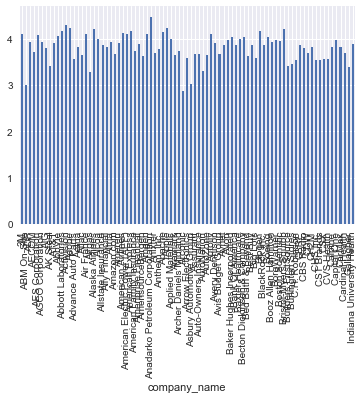

In [23]:
df_grp = df.copy()
df_grp = df_grp.groupby('company_name')
df_grp['agg_rating'].mean()

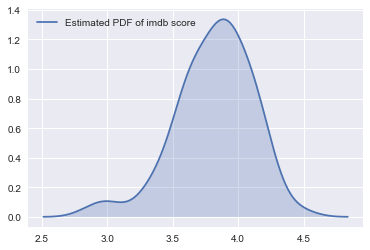

In [24]:
sns.kdeplot(df_grp['agg_rating'].mean(), shade=True, label='Estimated PDF of company mean agg_rating score')

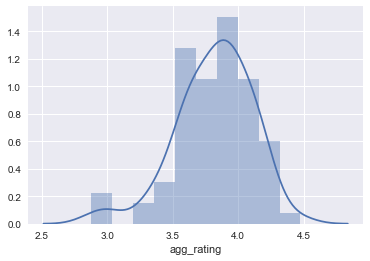

In [27]:
sns.distplot(df_grp['agg_rating'].mean())

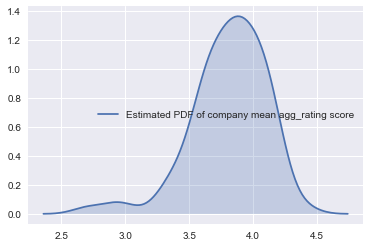

In [25]:
sns.kdeplot(df_grp['company_overall_rating'].mean(), shade=True, label='Estimated PDF of company mean agg_rating score')

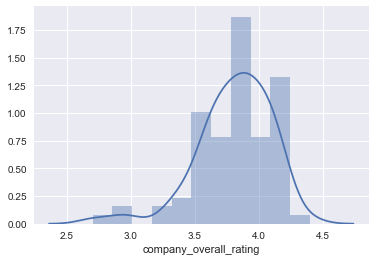

In [26]:
sns.distplot(df_grp['company_overall_rating'].mean())